In [0]:
# If running from a normal jupyter notebook then

#from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("Basic").getOrCreate()

In [0]:
df = spark.read.json('/FileStore/tables/people.json')

In [0]:
df.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [0]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [0]:
df.columns

Out[5]: ['age', 'name']

In [0]:
df.describe()

Out[6]: DataFrame[summary: string, age: string, name: string]

In [0]:
df.describe().show()

+-------+------------------+-------+
|summary|               age|   name|
+-------+------------------+-------+
|  count|                 2|      3|
|   mean|              24.5|   null|
| stddev|7.7781745930520225|   null|
|    min|                19|   Andy|
|    max|                30|Michael|
+-------+------------------+-------+



In [0]:
from pyspark.sql.types import (StructField,StringType,
                               IntegerType,StructType)

In [0]:
data_schema = [StructField("age",IntegerType(),True),
              StructField("name",StringType(),True)]

In [0]:
final_schema = StructType(data_schema)

In [0]:
df = spark.read.json("/FileStore/tables/people.json",schema=final_schema)
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- name: string (nullable = true)



In [0]:
type(df["age"])  #returning a Column object

Out[12]: pyspark.sql.column.Column

In [0]:
df.select("age").show()  #returning a dataframe object

+----+
| age|
+----+
|null|
|  30|
|  19|
+----+



In [0]:
type(df.select("age"))

Out[14]: pyspark.sql.dataframe.DataFrame

In [0]:
df.head(2)

Out[15]: [Row(age=None, name='Michael'), Row(age=30, name='Andy')]

In [0]:
df.head(2)[0]

Out[16]: Row(age=None, name='Michael')

In [0]:
type(df.head(2)[0])

Out[17]: pyspark.sql.types.Row

In [0]:
df.select(["age","name"]).head(2)

Out[18]: [Row(age=None, name='Michael'), Row(age=30, name='Andy')]

In [0]:
df=df.withColumnRenamed("age","ages")
df.show()

+----+-------+
|ages|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [0]:
df=df.withColumn("futureage",df["ages"]+50)
df.show()

+----+-------+---------+
|ages|   name|futureage|
+----+-------+---------+
|null|Michael|     null|
|  30|   Andy|       80|
|  19| Justin|       69|
+----+-------+---------+



In [0]:
!pip install pyspark_dist_explore

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


Out[22]: (array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([19.  , 19.55, 20.1 , 20.65, 21.2 , 21.75, 22.3 , 22.85, 23.4 ,
        23.95, 24.5 , 25.05, 25.6 , 26.15, 26.7 , 27.25, 27.8 , 28.35,
        28.9 , 29.45, 30.  ]),
 <BarContainer object of 20 artists>)

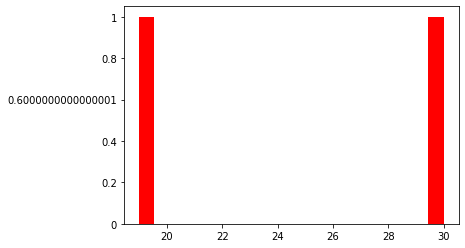

In [0]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, df.select('ages'), bins = 20, color=['red'])

In [0]:
df.createOrReplaceTempView("people")

In [0]:
%sql

select * from people;

ages,name,futureage
null,Michael,null
30,Andy,80
19,Justin,69


# Sprak Operation

In [0]:
# File location and type
file_location = "/FileStore/tables/appl_stock.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

Date,Open,High,Low,Close,Volume,Adj Close
2010-01-04T00:00:00.000+0000,213.429998,214.499996,212.38000099999996,214.009998,123432400,27.727039
2010-01-05T00:00:00.000+0000,214.599998,215.589994,213.249994,214.379993,150476200,27.774976000000002
2010-01-06T00:00:00.000+0000,214.379993,215.23,210.750004,210.969995,138040000,27.333178000000004
2010-01-07T00:00:00.000+0000,211.75,212.000006,209.050005,210.58,119282800,27.28265
2010-01-08T00:00:00.000+0000,210.299994,212.000006,209.06000500000002,211.98000499999998,111902700,27.464034
2010-01-11T00:00:00.000+0000,212.79999700000002,213.000002,208.450005,210.11000299999998,115557400,27.221758
2010-01-12T00:00:00.000+0000,209.18999499999998,209.76999500000002,206.419998,207.720001,148614900,26.91211
2010-01-13T00:00:00.000+0000,207.870005,210.92999500000002,204.099998,210.650002,151473000,27.29172
2010-01-14T00:00:00.000+0000,210.11000299999998,210.45999700000002,209.020004,209.43,108223500,27.133657
2010-01-15T00:00:00.000+0000,210.92999500000002,211.59999700000003,205.869999,205.93,148516900,26.680197999999997


In [0]:
df.filter("Close < 500").select(["Date","Open"]).show()

+-------------------+------------------+
|               Date|              Open|
+-------------------+------------------+
|2010-01-04 00:00:00|        213.429998|
|2010-01-05 00:00:00|        214.599998|
|2010-01-06 00:00:00|        214.379993|
|2010-01-07 00:00:00|            211.75|
|2010-01-08 00:00:00|        210.299994|
|2010-01-11 00:00:00|212.79999700000002|
|2010-01-12 00:00:00|209.18999499999998|
|2010-01-13 00:00:00|        207.870005|
|2010-01-14 00:00:00|210.11000299999998|
|2010-01-15 00:00:00|210.92999500000002|
|2010-01-19 00:00:00|        208.330002|
|2010-01-20 00:00:00|        214.910006|
|2010-01-21 00:00:00|        212.079994|
|2010-01-22 00:00:00|206.78000600000001|
|2010-01-25 00:00:00|202.51000200000001|
|2010-01-26 00:00:00|205.95000100000001|
|2010-01-27 00:00:00|        206.849995|
|2010-01-28 00:00:00|        204.930004|
|2010-01-29 00:00:00|        201.079996|
|2010-02-01 00:00:00|192.36999699999998|
+-------------------+------------------+
only showing top

In [0]:
df.filter("Close < 500").select(["Date","Open"]).createOrReplaceTempView("Close500")

In [0]:
%sql
select * from Close500;

Date,Open
2010-01-04T00:00:00.000+0000,213.429998
2010-01-05T00:00:00.000+0000,214.599998
2010-01-06T00:00:00.000+0000,214.379993
2010-01-07T00:00:00.000+0000,211.75
2010-01-08T00:00:00.000+0000,210.299994
2010-01-11T00:00:00.000+0000,212.79999700000002
2010-01-12T00:00:00.000+0000,209.18999499999998
2010-01-13T00:00:00.000+0000,207.870005
2010-01-14T00:00:00.000+0000,210.11000299999998
2010-01-15T00:00:00.000+0000,210.92999500000002


In [0]:
%sql
select * from Close500;

Date,Open
2010-01-04T00:00:00.000+0000,213.429998
2010-01-05T00:00:00.000+0000,214.599998
2010-01-06T00:00:00.000+0000,214.379993
2010-01-07T00:00:00.000+0000,211.75
2010-01-08T00:00:00.000+0000,210.299994
2010-01-11T00:00:00.000+0000,212.79999700000002
2010-01-12T00:00:00.000+0000,209.18999499999998
2010-01-13T00:00:00.000+0000,207.870005
2010-01-14T00:00:00.000+0000,210.11000299999998
2010-01-15T00:00:00.000+0000,210.92999500000002


In [0]:
df.filter( (df['Close']<200) & (df['Open']> 200)).select(["Date","Volume"]).show()

+-------------------+---------+
|               Date|   Volume|
+-------------------+---------+
|2010-01-22 00:00:00|220441900|
|2010-01-28 00:00:00|293375600|
|2010-01-29 00:00:00|311488100|
+-------------------+---------+



In [0]:
result = df.filter( (df['Close']<200) & (df['Open']> 200)).select(["Date","Volume"]).collect()

In [0]:
result[0].asDict()

Out[32]: {'Date': datetime.datetime(2010, 1, 22, 0, 0), 'Volume': 220441900}

In [0]:


# File location and type
file_location = "/FileStore/tables/sales_info.csv"
file_type = "csv"
 
# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
 
# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
 
display(df)

Company,Person,Sales
GOOG,Sam,200.0
GOOG,Charlie,120.0
GOOG,Frank,340.0
MSFT,Tina,600.0
MSFT,Amy,124.0
MSFT,Vanessa,243.0
FB,Carl,870.0
FB,Sarah,350.0
APPL,John,250.0
APPL,Linda,130.0


In [0]:
df.createOrReplaceTempView("Sales")

In [0]:
df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Person: string (nullable = true)
 |-- Sales: double (nullable = true)



In [0]:
%sql
select count(*) as `number of Occurance`,Company from sales group by Company;

number of Occurance,Company
4,APPL
3,GOOG
2,FB
3,MSFT


In [0]:
df.groupBy("Company")

Out[36]: <pyspark.sql.group.GroupedData at 0x7f9f15f8a430>

In [0]:
df.groupBy("Company").mean().show()

+-------+-----------------+
|Company|       avg(Sales)|
+-------+-----------------+
|   APPL|            370.0|
|   GOOG|            220.0|
|     FB|            610.0|
|   MSFT|322.3333333333333|
+-------+-----------------+



In [0]:
from pyspark.sql.functions import countDistinct,avg,stddev

In [0]:
df.select(countDistinct("Sales").alias("Distinct Sales Count")).show()

+--------------------+
|Distinct Sales Count|
+--------------------+
|                  11|
+--------------------+

